analyze_chr_i(i) - i - индекс хромосомы с 0
строит графики:
- матрица расстояний, сгенерированная из pdb кривой (хитмап)
- плотность распределения количества бинов в зависимости от расстояния между ними (в мм)
- наблюдаемое значение hic в зависимости от расстояния между бинами,
BUCKETS_CNT - расмматриваем пары бинов, попадающие в один бакет по расстоянию между ними.
Внутри бакета значения hic усредняются и строится гистограмма.
Длина в мм одного бакета max(dist) - min(dist) / BUCKETS_CNT соответственно
- основной график анализа хромосомы.
Отлогарифмированный предыдущий график, зависимость ln(hic) от ln(dist), к нему применяется
линейная регрессия, после этого можно узнать коэффициенты зависимости между
hic и матрицей расстояний, сгенерированной из pdb файла

Предполагаемая зависимость
DIST[i][j] = 1 / HIC[i][j]^factor
factor = k^-1
i, j - любая пара бинов

Некоторые программы по типу 3DMax уже выдают оптимальный factor, с которым строилась кривая в pdb,
этот график также позволяет сравнить их распределение с заявленным

Также на этом графике прозрачным нарисована плотность распределения (координаты xs были отлогарифмированы для удобства
наложения графиков)


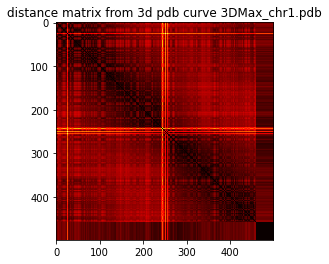

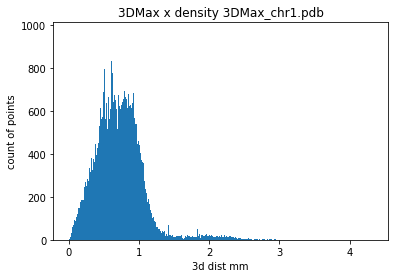

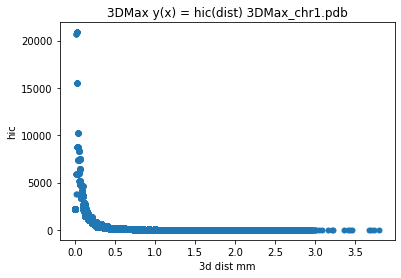

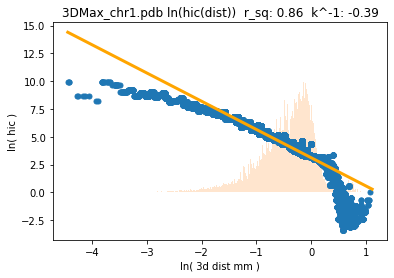

In [1]:
from main import analyze_chr_i

In [ ]:
analyze_chr_i(0)